In [1]:
%matplotlib inline

from IPython.display import display as d
from IPython.display import Image


import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
import glob
import json
import os
import sys
import json
import shutil
from pprint import pprint
import matplotlib.pyplot as plt

def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")


In [2]:
# checkout rule predictions
def read_json(x):
    with open(x) as xfp:
        j = json.load(xfp)
    return j

def read_rule(path):
    dr = pd.DataFrame(
        sum(
            list(
                map(read_json, glob.glob(path))
            ), []
        )
    )
    dr["db"] = dr["image"].apply(lambda x: x.split("/")[2]) 
    return dr

dr = read_rule("rule_of_thirds.json")
dr["rule"] = "rule of thirds"
d(dr)

,image,prediction,db,rule
0,../images/own/medium/IMG_4480.jpg,9.999990e-01,own,rule of thirds
1,../images/own/medium/IMG_7057.jpg,8.781438e-01,own,rule of thirds
2,../images/own/medium/IMG_6222.jpg,6.935015e-10,own,rule of thirds
3,../images/own/medium/IMG_20190513_210752882.jpg,9.633073e-01,own,rule of thirds
4,../images/own/medium/IMG_20190604_212833103.jpg,6.005168e-04,own,rule of thirds
...,...,...,...,...
1056,../images/ava/medium/728541.jpg,3.098488e-03,ava,rule of thirds
1057,../images/ava/medium/148871.jpg,2.256501e-09,ava,rule of thirds
1058,../images/ava/medium/312526.jpg,2.446496e-02,ava,rule of thirds
1059,../images/ava/medium/875370.jpg,9.999996e-01,ava,rule of thirds


In [3]:
ds = read_rule("simplicity.json")
ds["rule"] = "simplicity" 
d(ds)

,image,prediction,db,rule
0,../images/500px_cc0/medium/78827175_Mug_of_Coc...,7.528576e-01,500px_cc0,simplicity
1,../images/500px_cc0/medium/162876571_among_the...,8.398860e-05,500px_cc0,simplicity
2,../images/500px_cc0/medium/194901225_Frozen_Ba...,1.581364e-08,500px_cc0,simplicity
3,../images/500px_cc0/medium/162077443_Sunset.jpg,2.959033e-06,500px_cc0,simplicity
4,../images/500px_cc0/medium/139228225_Sunset-Pi...,8.918394e-06,500px_cc0,simplicity
...,...,...,...,...
1056,../images/pixabay_first50k/medium/nature-96329...,5.627811e-03,pixabay_first50k,simplicity
1057,../images/pixabay_first50k/medium/potion-12490...,8.457637e-01,pixabay_first50k,simplicity
1058,../images/pixabay_first50k/medium/wine-1796891...,1.000000e+00,pixabay_first50k,simplicity
1059,../images/pixabay_first50k/medium/waterscape-4...,3.303930e-02,pixabay_first50k,simplicity


In [4]:
db_order = sorted(set(ds["db"].values))
print(db_order)

['500px_cc0', 'aadb', 'ava', 'koniq10k', 'own', 'pixabay_first50k']


,image,prediction,db,rule
0,../images/500px_cc0/medium/78827175_Mug_of_Coc...,7.528576e-01,500px_cc0,simplicity
1,../images/500px_cc0/medium/162876571_among_the...,8.398860e-05,500px_cc0,simplicity
2,../images/500px_cc0/medium/194901225_Frozen_Ba...,1.581364e-08,500px_cc0,simplicity
3,../images/500px_cc0/medium/162077443_Sunset.jpg,2.959033e-06,500px_cc0,simplicity
4,../images/500px_cc0/medium/139228225_Sunset-Pi...,8.918394e-06,500px_cc0,simplicity
...,...,...,...,...
2117,../images/ava/medium/728541.jpg,3.098488e-03,ava,rule of thirds
2118,../images/ava/medium/148871.jpg,2.256501e-09,ava,rule of thirds
2119,../images/ava/medium/312526.jpg,2.446496e-02,ava,rule of thirds
2120,../images/ava/medium/875370.jpg,9.999996e-01,ava,rule of thirds


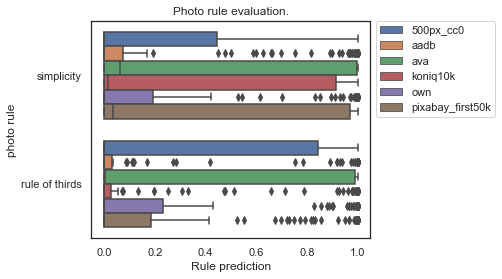

In [5]:
drules = pd.concat([ds, dr], ignore_index=True)
d(drules)

ax = sns.boxplot(x="prediction", y="rule", hue="db", data=drules, hue_order=db_order)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_ylabel("photo rule")
ax.set_xlabel("Rule prediction")
save_fig(ax, "Photo rule evaluation.", "rules.pdf")
